# Evaluating classifiers

### Concepts
- Accuracy
- Confusion Matrix
- Precision
- Recall (also called Sensitivity)
- F1-Score
- ROC-Curve
- AUC (Area under Curve)

---

* **Learning objective**: 
    * Understand the main tools available to judge your model
    * **sklearn.metrics** is your friend!
* **Content to be covered**:
    * True & False /  Positives & Negatives: 
    * Accuracy
    * Precision vs Recall
    * ROC and AUC
    * Confusion Matrix
* **First the theory, then the applied coding**

---

## True & False /  Positives & Negatives:

| Scenario | Predicted: NO | Predicted: YES |
| --- | ----- | --- |
| **Actual: NO** | True Negative | False Positive |
| **Actual: YES** | False Negative | True Positive |

- True means model and data agree

- False means model and data disagree

- Positive means event is triggered - 1 value

- Negative means an event is not triggered - 0 value

**True Positive** - We predicted the major would survive and he did so we have a True positive (1) outcome.

**True Negative** - We predicted the person would die and she did so we got a True negative (0) outcome.

**False Positive** - We predicted someone would survive and little chimney sweep Bertie died so we have a False Positive prediction that he would survive.

**False Negative** - incorrectly predict a negative outcome - We predicted big fat Count von Marx would die but he survived therefore our negative (0) prediction of death was FALSE - False Negative!

## Examples

#### Scenario 1: Gold Diggers!
* We build a scanner which scans earth samples from different regions for gold. If we find it we excavate that area.
* Important to consider: Excavating earth is expensive! So if we don't find gold we lose lots of money! 
* Input: 100 diamonds. the model says: 70 real, 30 fake. Actually, 90 real, 10 fake
* How good is our model?
* Want to minimise missed opportunities

#### Scenario 2: Test for Breast Cancer
* We build a tool which tests mammograms for the presence of breast cancer
* Input: 100 mammograms. The model says: 70 clear, 30 cancerous. Actually, 90 clear, 10 cancerous
* How good is our model?
* We want to minimise risk!
* **Lets work through a practical application of scenario 2**

Here, we've included a lot of False Positives!

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### X data is a matrix (more than 1 dimension), y is a vector(only 1 dimension)!

In [2]:
X, y = load_breast_cancer(return_X_y = True)

In [3]:
print(X.shape, y.shape)

(569, 30) (569,)


In [4]:
y[:50] # Series of 1s and 0s telling you who does and doesn't
       # have cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [5]:
X[0] # these are the a coefficient values

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
m = LogisticRegression()   #creating a model
m.fit(X, y)                # training the model

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
m.score(X, y)     # calculating the score == accuracy score

0.9595782073813708

---

## Accuracy:
* The percentage of correct guesses
* A nice simple way of assessing the model
* Fails with class imbalance

A common metric in classification, it fails when we have highly imbalanced classes. In those cases, F1 is more appropriate!

How to do an accuracy score without m.score:

In [9]:
from sklearn.metrics import accuracy_score    #import
ypred = m.predict(X)        #generating predictive results
accuracy_score(y, ypred)    # compare the results with our actual results

0.9595782073813708

---

### Precision vs Recall
* A trade off between exactness and totalness
* Precision = **exactness** 
    * High Precision = more relevant than irrelevant results returned (at the expense of missing some relevant ones)
    * Also called False Positive Rate
    * High when false positives are low

**Precision is the ability of a classifier to not label a true negative as positive!**

\begin{align}
\frac{True Positive}{True Positive + False Positive}
\end{align}
    
* Recall = **totalness**. 
    * High Recall = most of the relevant results returned (at the expense of including bad results)
    * Also called True Positive Rate
    * High when false negatives are low 
* Remember the two scenarios! Which one suits which measure?

Recall is all about real positives!


**Recall is the ability of the classifier to find positive examples. If we wanted to be certain to find all positive examples, we could maximise recall!**

\begin{align}
\ True  Postive  Rate  (TPR) = \frac{True Positives}{True Positives + False Negatives}
\end{align}



i.e. Precision - exact - If it's exact, it means it doesn't make many mistakes eg in gold example it's good to have high precision even if you miss some.

Recall is making sure False negatives are low (ie predicts it's false but actually True) - better to incorrectly tell people they have breast cancer and then correct it then tell someone they don't have it and they do!

In [10]:
from sklearn.metrics import precision_score, recall_score

In [11]:
precision_score(y, ypred)

0.9613259668508287

So here we have few false positives (i.e. when your model tells someone they have breast cancer but they don't) so precision is high: 4% chance we tell someone they have it but they don't.

In [12]:
recall_score(y, ypred)

0.9747899159663865

This is very high! Here we have few false negatives - ie your model tells someone they DON'T have breast cancer but your model is wrong and they do - 2.5% chance we tell someone they don't have breast cancer but they do! This is what we want to avoid!

---

## Confusion matrix

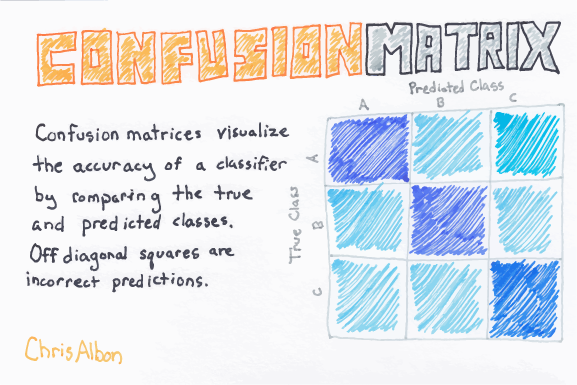

* Lets plot the confusion matrix of scenario two, and then prettify it with seaborn
* Refer above to understand the structure

In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y, ypred)
confusion

array([[198,  14],
       [  9, 348]])

**Remember:**

| Scenario | Predicted: NO | Predicted: YES |
| --- | ----- | --- |
| **Actual: NO** |True Negative | False Positive |
| **Actual: YES** | False Negative | True Positive |

In [14]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Text(24.0, 0.5, 'Actual')

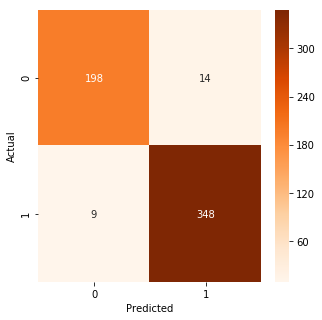

In [15]:
plt.figure(figsize = (5,5))

sns.heatmap(confusion,           #confusion matrix from above
            xticklabels = np.unique(y), # just labels x-axis
            yticklabels = np.unique(y), # just labels y-axis (unique - removes duplicates)
            cmap = 'Oranges',  
            annot = True,      #includes the annotations of the numbers on coloured squares
            fmt = 'g')         # gives us integers on those coloured squares instead of
                               # scientific notation!
plt.xlabel("Predicted")
plt.ylabel("Actual")

- Top left corner says NO breast cancer in actuality, and no breast cancer in the model therefore a TRUE NEGATIVE.

- Top right corner says in actuality NO breast cancer, but our model predicted they do therefore a FALSE POSITIVE.

- Bottom left says they DO have breast cancer in actuality, but our model predicted they DON'T so we have a FALSE NEGATIVE.

- Bottom right says in actuality they DO have breast cancer, and our model agrees therefore we have a TRUE POSITIVE.

---

## ROC & AUC

### ROC - Receiver Operating Characteristic

* A bit like the confusion matrix, but it still works when there is class imbalance
* Receiver Operating Characteristics Curve 
    * ROC shows the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
    * Put another way, plot recall on the x-axis, and precision on the y-axis
    
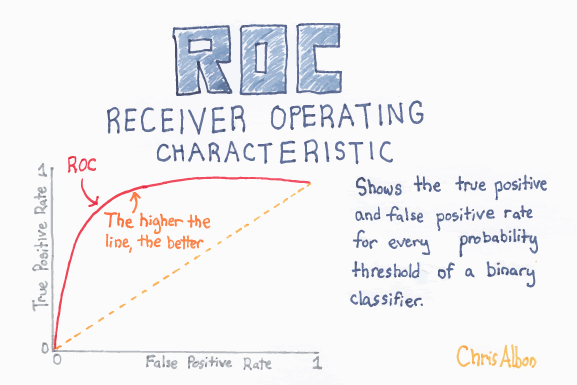


### AUC - Area Under Curve

* The AUC function takes both the true outcomes (0, 1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0
* We basically want as much under the curve as possible! So the higher the AUC the better!

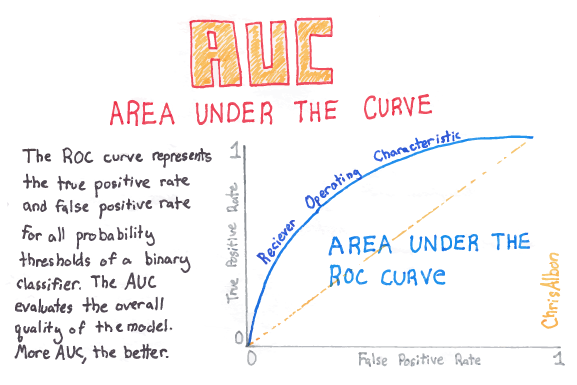

In [16]:
X.shape, y.shape

((569, 30), (569,))

Text(0, 0.5, 'x2')

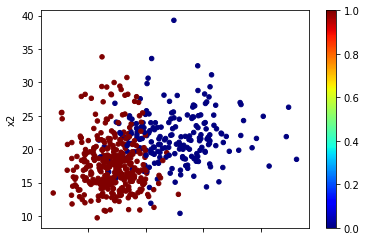

In [17]:
df = pd.DataFrame(X)
df.plot.scatter(0,1, c=y, cmap='jet')

plt.xlabel('x1')
plt.ylabel('x2')

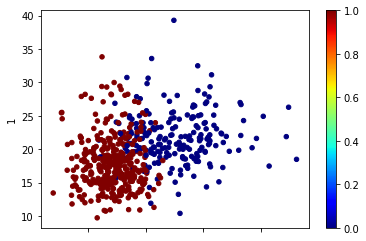

In [18]:
df.plot.scatter(0, 1, c=ypred, cmap='jet')

In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [20]:
roc_auc_score(y, ypred)

0.9543760900586651

In [29]:
roc_curve(y, ypred)

(array([0.        , 0.06603774, 1.        ]),
 array([0.        , 0.97478992, 1.        ]),
 array([2, 1, 0]))

**fpr** : Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

**tpr** : Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

**thresholds** : array, shape = [n_thresholds]. Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

In [30]:
fpr, tpr, thresholds = roc_curve(y, ypred)

In [31]:
fpr

array([0.        , 0.06603774, 1.        ])

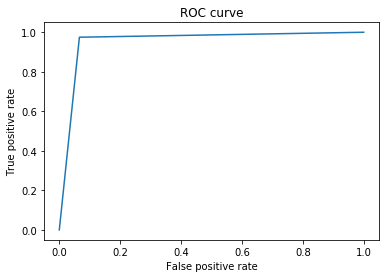

In [35]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [74]:
print(f'AUC: {round(auc(fpr, tpr)*100, 2)}%')

AUC: 95.44%


### Exercises

1. When is the accuracy not a good metric?

2. Evaluate your model

**easy**: calculate an accuracy. **medium**: calculate precision and recall. **hard**: draw an ROC curve or precision-recall plot

3. Decision Boundary

Plot the decision boundary for two scalar features from the Titanic dataset. Use this code example:

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# Loading some example data to play with
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [44]:
X.shape, y.shape

((150, 2), (150,))

In [47]:
# Train a classification model
m = DecisionTreeClassifier(max_depth=4)
m.fit(X, y)
# What about other models? Try them here as well.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
m.score(X, y)

0.98

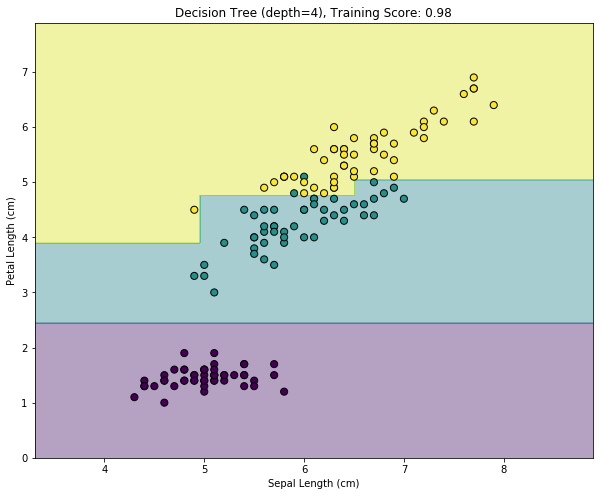

In [67]:
#step size in the mesh
h = 0.01

#Plotting decision regions
#For that, we will assign a color to each point in the mesh [x_min, x_max] * [y_min, y_max]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Xgrid = np.c_[xx.ravel(), yy.ravel()]
Z = m.predict(Xgrid)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

#plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title(f'Decision Tree (depth=4), Training Score: {round(m.score(X, y), 2)}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

---